In [1]:
#by Narges Shahmohammadi Heydari
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df= pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.dtypes# take a look to the type of variables 

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

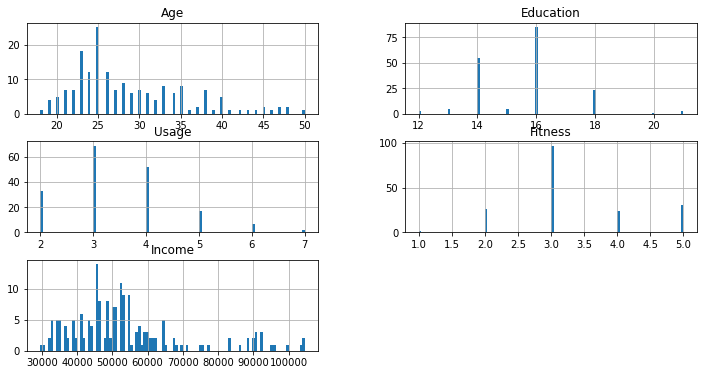

In [6]:
columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [4]:
#change the object variables to the category for some analysis 
df.Product=df["Product"].astype("category")
df.MaritalStatus=df["MaritalStatus"].astype("category")
df.Gender=df["Gender"].astype("category")

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [6]:
df.isnull().sum()# Are there any missing values?

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.shape#we have 180 rows and 9 columns

(180, 9)

In [8]:
df.describe()
#Check the data describe

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


* By using of 'describe' function we can see some of data's details but it is interesting for me to get their plot too

# Univariate Data Analysis


lets take a look to the Age column, first get a distplot to see its distribution and then convert the age ranges of 18-29, 30-39, 40-49 to see differences  

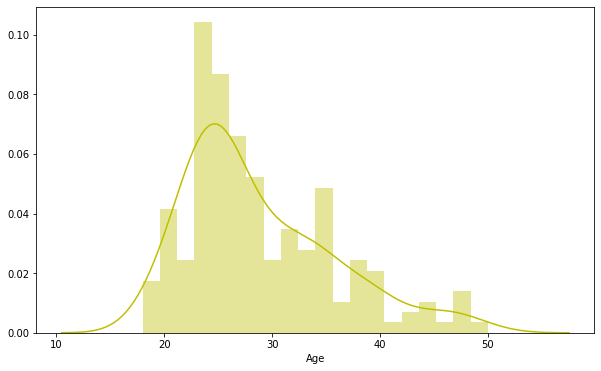

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df.Age,color="y",bins=20);

* Minimum age is around 18 and maximum age is almost 50. 
* its mean is 28.79 and as it is obvious it is skewed to the right. I can see some outliers after age of 46. 

In [11]:
bins = [18, 30, 40, 50, 60]
labels = ['18-29', '30-39', '40-49', '50-59']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
df#making group

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,agerange
0,TM195,18,Male,14,Single,3,4,29562,112,18-29
1,TM195,19,Male,15,Single,2,3,31836,75,18-29
2,TM195,19,Female,14,Partnered,4,3,30699,66,18-29
3,TM195,19,Male,12,Single,3,3,32973,85,18-29
4,TM195,20,Male,13,Partnered,4,2,35247,47,18-29
...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200,30-39
176,TM798,42,Male,18,Single,5,4,89641,200,40-49
177,TM798,45,Male,16,Single,5,5,90886,160,40-49
178,TM798,47,Male,18,Partnered,4,5,104581,120,40-49


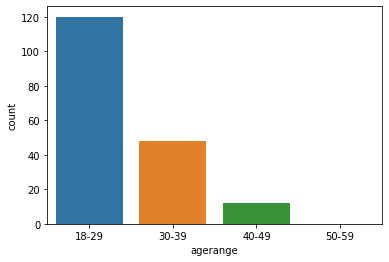

In [9]:
sns.countplot(data = df, x='agerange')
plt.show()

In [14]:
df['Age'].mean()

28.788888888888888


* between these groups, the first one (18-29) is the biggest one and by going toward older group ages, it is going to be smaller.

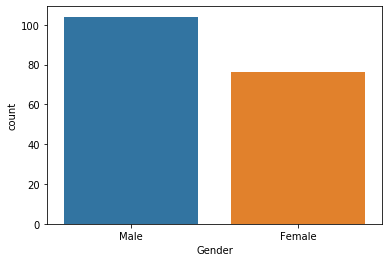

In [32]:
sns.countplot(data = df, x='Gender')
plt.show()#in comparison to males, females number is lower

* Males population is higher than females

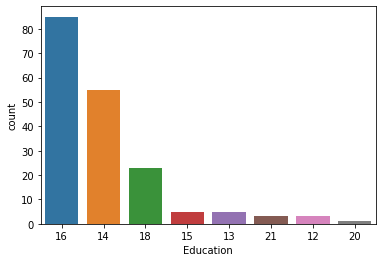

In [14]:
sns.countplot(data = df, x='Education',order= df['Education'].value_counts().index)
plt.show()


* More than 80 person of costumers have 16 years of education and around 55 person have 14 years of education

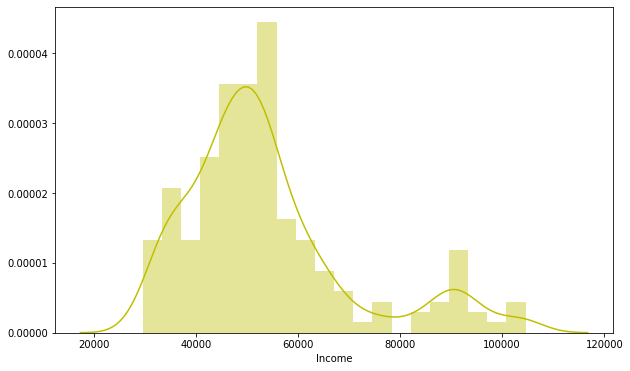

In [91]:
plt.figure(figsize=(10,6))
sns.distplot(df.Income,color="y",bins=20);


* The mean of income is 53719.58 and it skewed to the right. Its minimum is 29562.0 and maximum is 104581.0

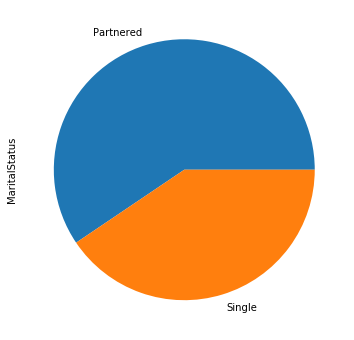

In [90]:
plt.figure(figsize=(10,6))
df['MaritalStatus'].value_counts().plot(kind='pie');

* There are both Partnered and Single customers but most of them have partner

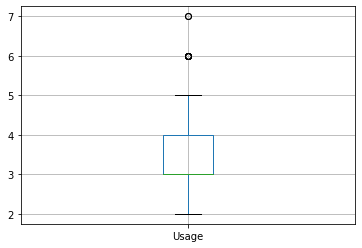

In [95]:

df.boxplot(column=['Usage'], return_type='axes');

* Avg.times the customer wants to use the treadmill every week, its medium is 3 times a week and maximum and minimum is 5 and 2 times a week 
* we can also see that there is some outliers in point 6 and 7.

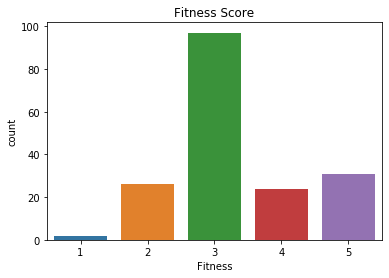

In [94]:
sns.countplot(data = df, x='Fitness')#Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
plt.title("Fitness Score")
plt.show()

* most of the customers gave themselves score of 3 for Self rated fitness

In [87]:
df['Product'].value_counts()#we have 3 different treadmills products.

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

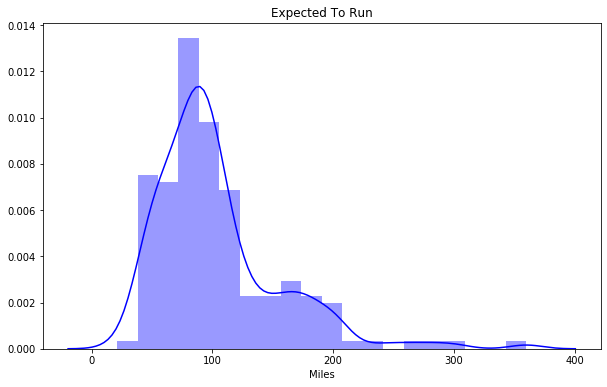

In [91]:
plt.figure(figsize=(10,6))
sns.distplot(df.Miles,color="b",bins=20)
plt.title("Expected To Run");

* As I showed before {by df.describe()}, customers expect to run on an average of 103.19 miles per week, a median of 94 miles per week.

# Multivariate Data Analysis

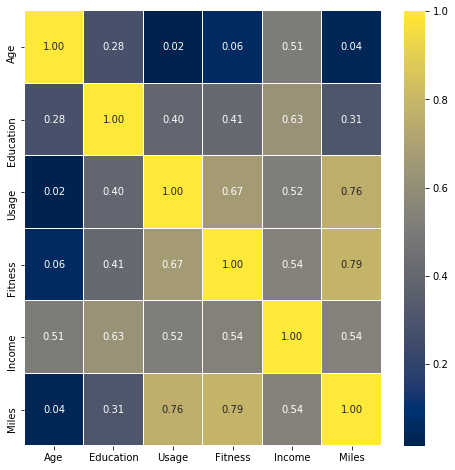

In [6]:
fig,ax = plt.subplots(figsize=(8,8))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="cividis") 
plt.show()


* By this heatmap we can see if there is any relation between variables; for example, it seems that there is no strong relationship between age and usage(0.02) or we have a strong relationship between fitness and miles(0.79).

In [141]:
df.corr()# the same results but in the frame

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


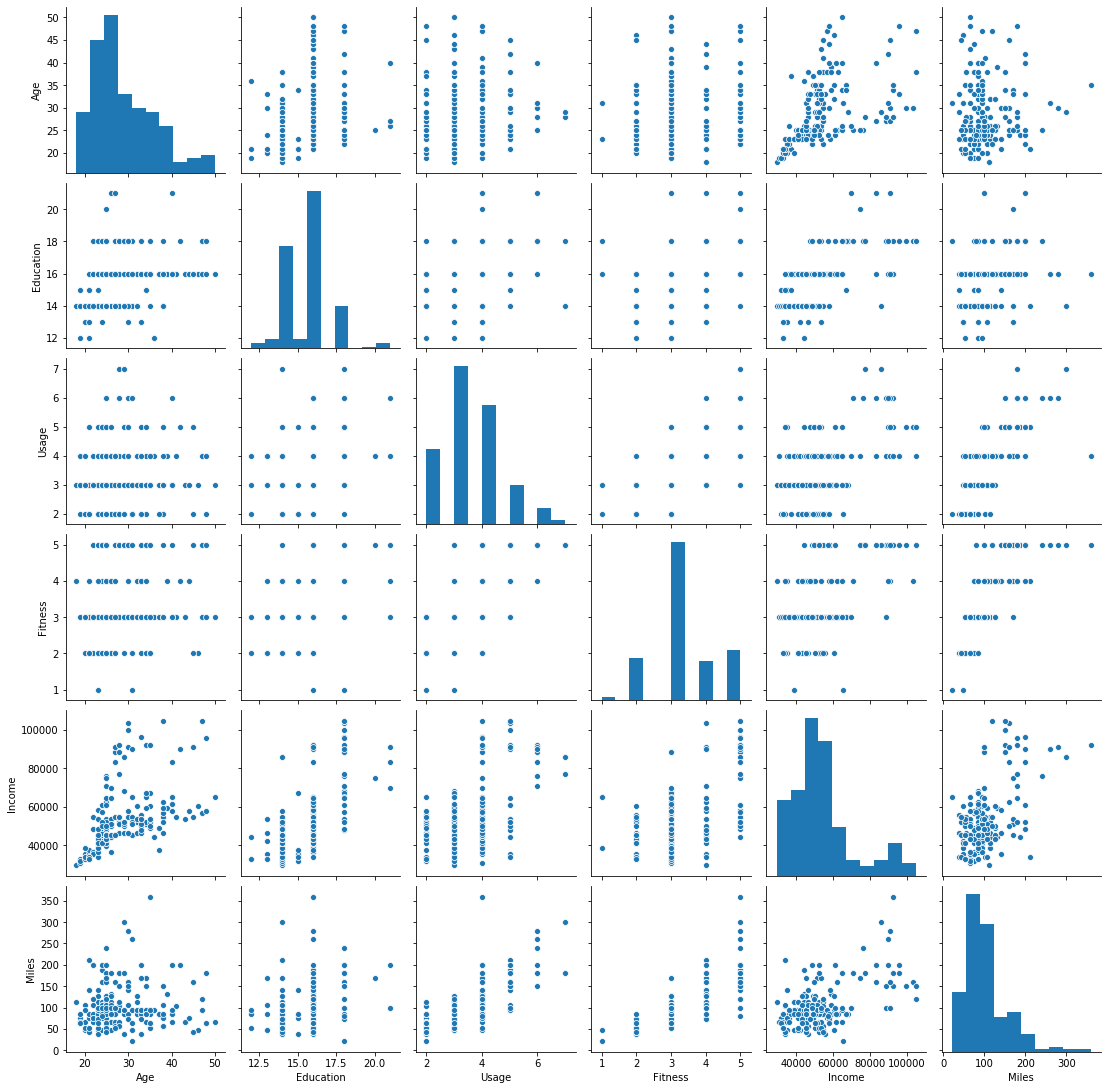

In [7]:
sns.pairplot(df);

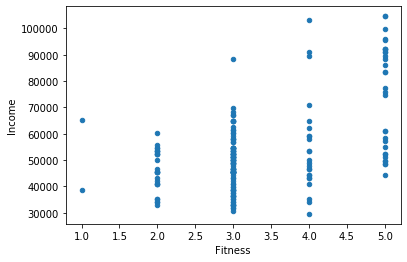

In [9]:
df.plot.scatter(x='Fitness',y='Income');
# here I tried to see if there is any relationship between income and fitness by scatter plot and the result shows us a positive relationship between them
# also we used df.corr() before and it shows that they have a high correlation= 0.53

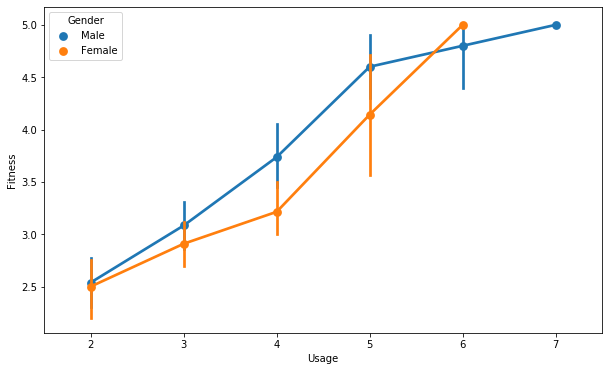

In [111]:
plt.figure(figsize=(10,6))
sns.pointplot(df['Usage'], df['Fitness'], hue=df['Gender']);


*  In both genders, a fitness degree is better for people who have more than 4 days a week of usage of treadmills

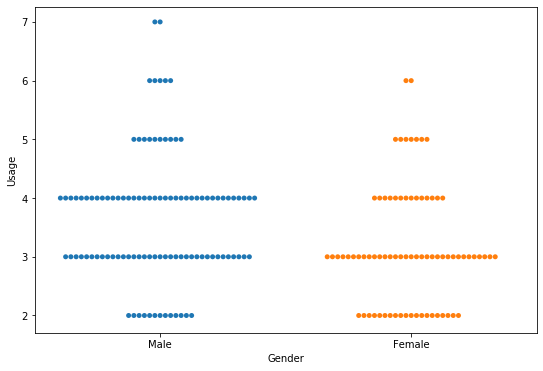

In [113]:
plt.figure(figsize=(9,6))
sns.swarmplot(data = df, x = 'Gender', y='Usage');

* average time which females are using treadmill in a week is less than males

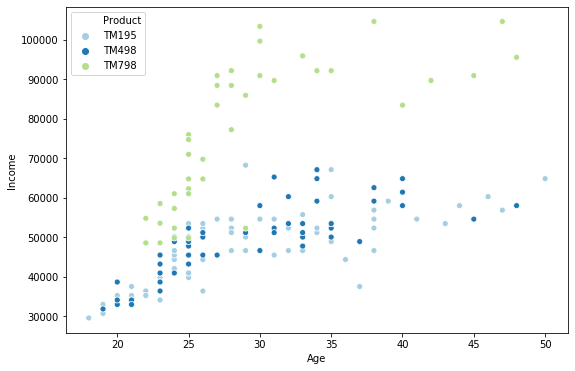

In [9]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Age', y='Income',data=df, hue = 'Product',palette= "Paired");

* product **model TM798** has more demand between young people. Most of the customers of **TM798** earn more than the customers of the model **TM498** and **TM195**.
* it seems that **TM798** is an expensive product as higher income people like to buy it.

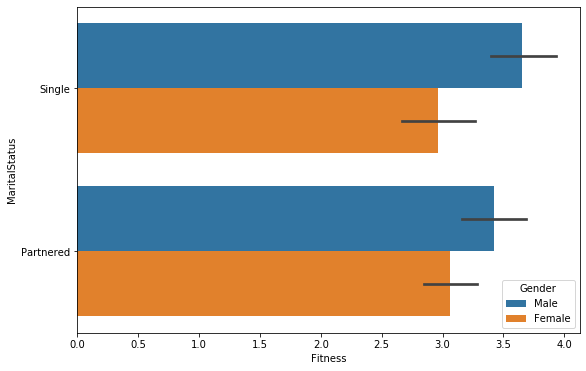

In [118]:
plt.figure(figsize=(9,6))
sns.barplot(data = df, x='Fitness',y='MaritalStatus', hue=df['Gender']);


* it seems marital status has no significant effect on females fitness. Also single males are fitted in compere to males who have partner

# **Now lets take a look at defferent products** 

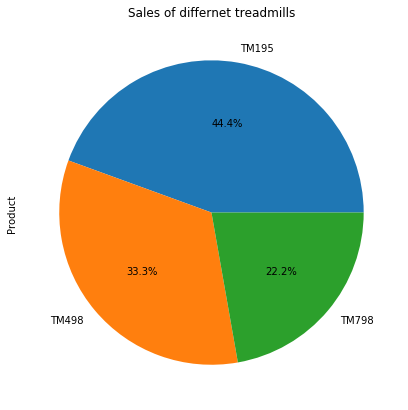

In [15]:
#sales of different treadmills
plt.figure(figsize=(10,7))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sales of differnet treadmills")
plt.show()

* TM195 has the biggest part of the sales and then model TM498 with 33% is the second one.

* TM798 with 22.2% is located in the third place.


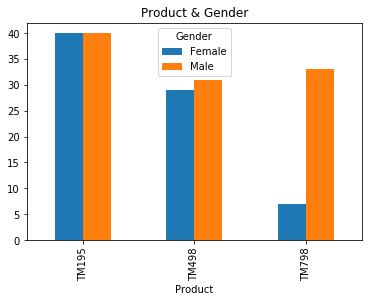

In [19]:
d_gender=pd.crosstab(df['Product'],df['Gender'] )
d_gender.plot(kind='bar')
plt.title("Product & Gender");

* it seems model TM798 is popular in Males than in female but two other products are popular in both gender

In [36]:
df.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

* Model TM798 is more popular among people who have a higher income

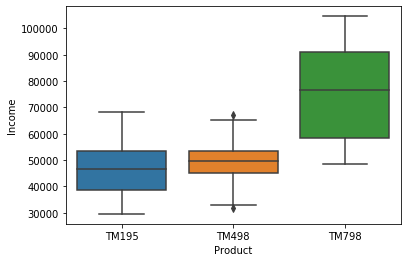

In [58]:
sns.boxplot(x="Product", y="Income", data=df);#the same results showing by plot...

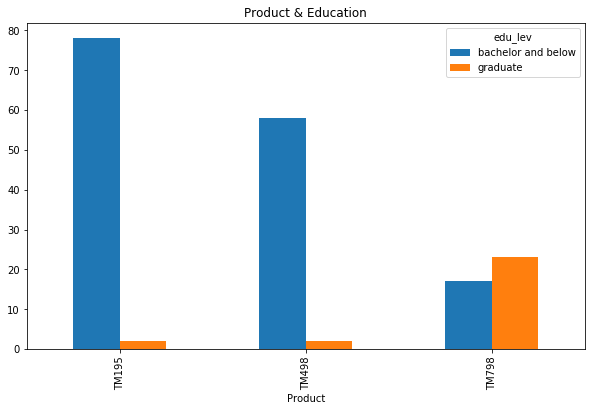

In [22]:
df['edu_lev']= np.where(df['Education']>=18, 'graduate','bachelor and below')
d_gender=pd.crosstab(df['Product'],df['edu_lev'] )
d_gender.plot(kind='bar',figsize=(10,6))
plt.title("Product & Education");#I grouped education into two categories for better understanding  

* By this plot we can see that people who purchased product model TM789 are more graduated. we can say there is a relationship between purchasing of this model, higher income, and graduation level 

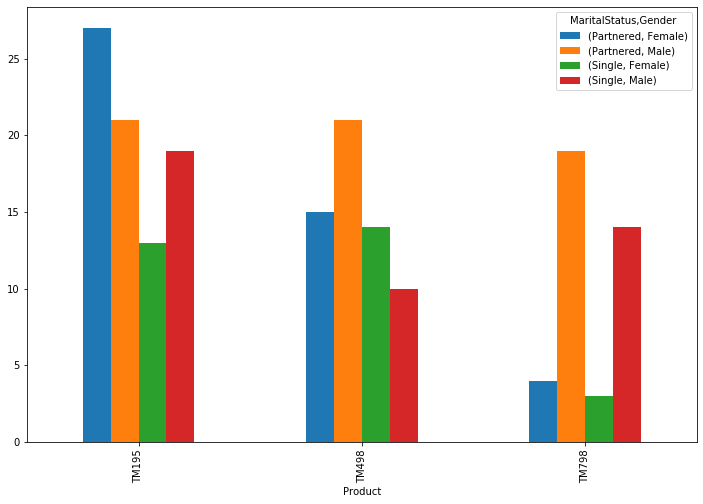

In [112]:
prod_ma = pd.crosstab(index=df["Product"], 
                         columns=[df["MaritalStatus"],
                           df["Gender"]])  
prod_ma.plot(kind='bar',figsize=(12,8));


* TM195 model is more buying by females who are living with their partners.
* TM798 model is less purchasing by females.

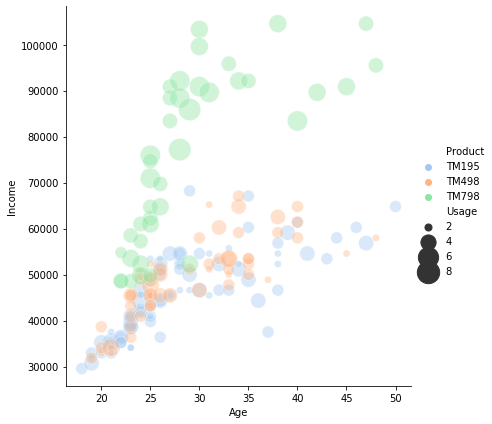

In [8]:
sns.relplot(data = df, x='Age', y='Income', hue='Product',size='Usage',sizes= (50,500), 
            alpha= 0.4, palette='pastel',height= 6 );


* Treadmills **model TM195** and **model TM498** are bought by people who have lower income (less than 70000) also their age falls in range of 18-35.
* As I showed before, Treadmills **model TM798** is mostly bought by people with higher than 70000 income and age between 25 and 35. 
* Also most of the people who buy the Treadmill **model TM798** expect that they will run more than people who use Tredmills **model TM195** and **model TM498**.
* It is clear that younger customers are more for all the treadmills (ages 22-35) and there is no significant patterns among three treadmills selection.
* we can see that usage of **model TM798** is a little higher than the others 
